## Importing the necessary libraries

In [1]:
#Basic Libraries to have
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv as csv

#ML libraries
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

#Display
%matplotlib inline
pd.set_option('max_columns', 82) # To be able to see all columns

## Loading the data

In [2]:
org_train=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
org_test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# Understanding the data - EDA

1. By looking at a sample of the data

In [3]:
train_df = org_train.copy(deep=True)
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1262,1263,50,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,4,5,1957,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1104,1104,GasA,Ex,Y,FuseA,1104,684,0,1788,1,0,1,0,5,1,TA,8,Min2,2,TA,Attchd,1957.0,Unf,1,304,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,161500
85,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,260000
757,758,60,RL,NaN,11616,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,5,1978,1978,Hip,CompShg,HdBoard,HdBoard,BrkCmn,328.0,TA,TA,CBlock,TA,TA,Mn,Rec,438,Unf,0,234,672,GasA,TA,Y,SBrkr,672,714,0,1386,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1978.0,Fin,2,440,TA,TA,Y,335,0,0,0,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Abnorml,158900
955,956,90,RH,82.0,7136,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,6,6,1946,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,423.0,TA,TA,CBlock,Gd,TA,No,Rec,484,Unf,0,495,979,GasA,TA,N,FuseF,979,979,0,1958,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1946.0,Unf,2,492,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,145000
476,477,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,6,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,215.0,TA,TA,PConc,Gd,TA,Gd,GLQ,994,Unf,0,484,1478,GasA,Ex,Y,SBrkr,1493,0,0,1493,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1997.0,Fin,2,508,TA,TA,Y,140,39,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,208900


2. Getting a summary of the data
 
 a. in terms of the null values present and the data type of each column

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

b. Statistical summary

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


3. Group the feature variables based on their properties

(a) First I checked the features with less than 15 unique values - to determine if they are categorical or simply discrete numerical type.

In [6]:
#Filtered based on the number of unique values, including null value, in each column 
chckcat_vars = [col for col in train_df.columns if train_df[col].nunique()<20]
unq_ct = [print(col,train_df[col].unique()) for col in chckcat_vars]
print(len(unq_ct))

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' '

(b) Based on the above result, I have listed the variables of each type as following:

(Here, I did not consider PoolArea feature as it is a continuous numerical variable despite having less than 20 unique values) 

In [7]:
ordCat = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2',
              'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond', 'GarageFinish',
               'PoolQC','Functional','Street','PavedDrive'] #to be custom encoded

discNum = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
           'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
           'GarageCars'] #to be treated as ordinal categorical variables

num2strCat = ['MSSubClass', 'MoSold', 'YrSold','YearRemodAdd','YearBuilt','GarageYrBlt'] #to be typecasted as str

nomCat = [col for col in train_df.columns 
          if col not in ordCat #and col not in discNum and col not in num2strCat
          and train_df[col].dtype == 'object'] #to be transformed using ohe

# to be used later for handling missing data
categorical_vars = ordCat + discNum + num2strCat + nomCat 
print('Number of categorical features:', len(categorical_vars))

numerical_vars = [feat for feat in train_df.columns if feat not in categorical_vars]
print('Number of numerical features:', len(numerical_vars))

Number of categorical features: 60
Number of numerical features: 21


Create a dictionary for typecasting the num2strCat variables

In [8]:
transf1_dict = dict.fromkeys(num2strCat,'object')
#Transformation to be done:
#train_df = train_df.astype(transf1_dict)

(c) In the next step, I grouped the features describing a common property of the house by creating a dictionary. Here, each common property is indicated by the key and the corresponding value is the array of the features that describe the property. 

This dictionary is created to use the information present across similar features in handling missing data. Not considering properties like Roof and Lot as it doesn't make sense for these features to be absent for a house.

In [9]:
grp_dict = {
    'Bsmt':['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'],
    'Fireplace':['Fireplaces','FireplaceQu'],
    'Garage': ['GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','GarageYrBlt'],
    'Pool': ['PoolArea','PoolQC'],
    'Mas_veneer': ['MasVnrType','MasVnrArea']
}

## Understanding the relationship between variables

### Univariate analysis

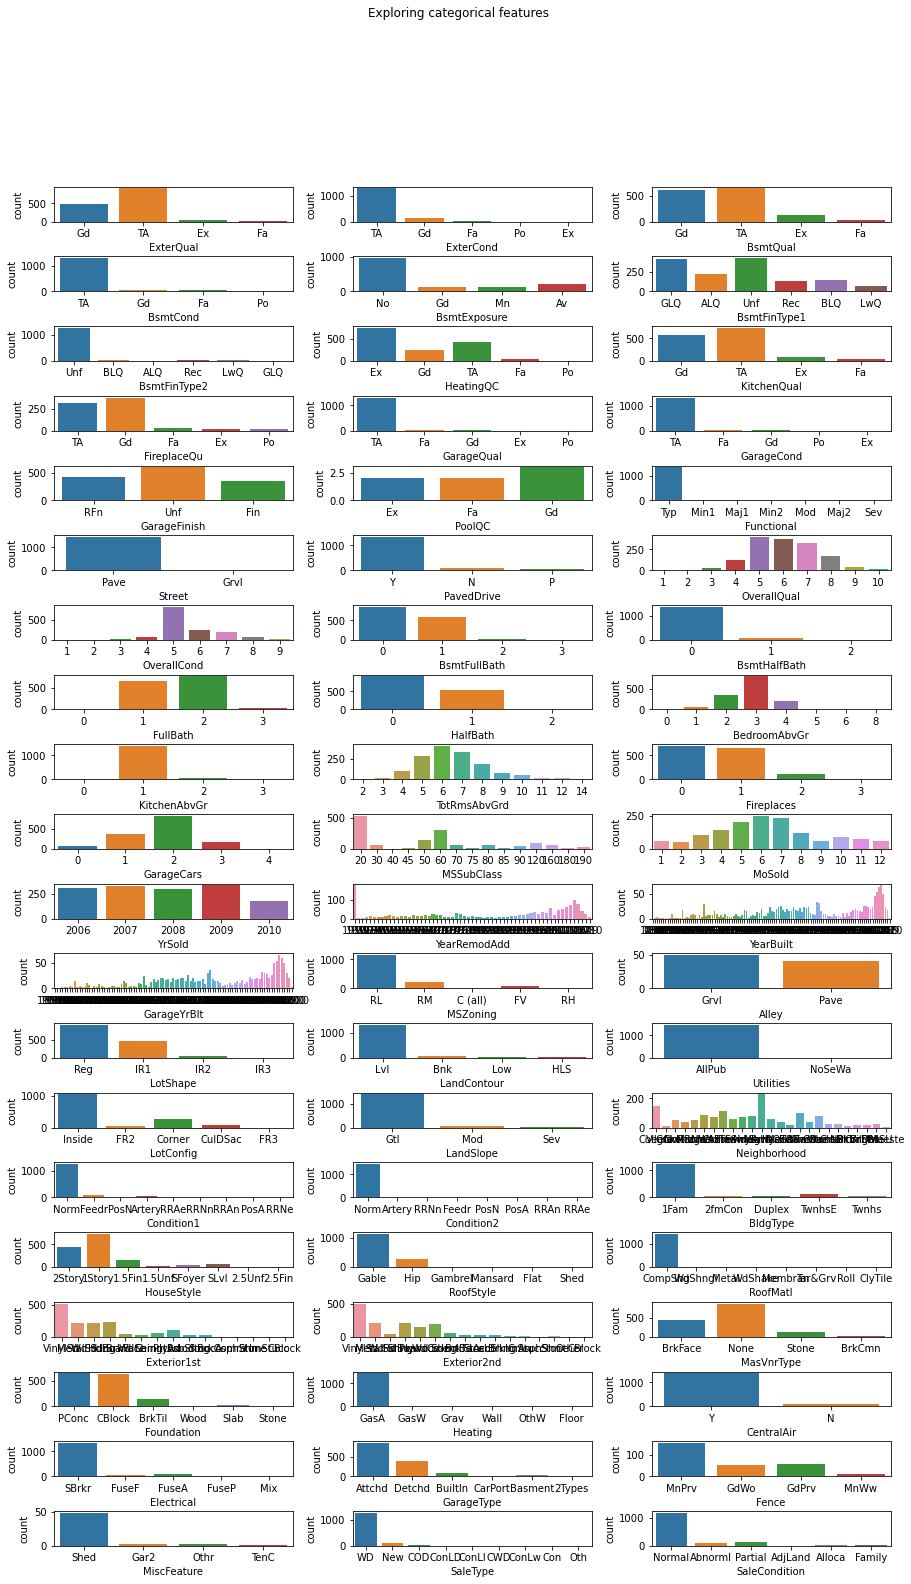

In [10]:
fig, axs = plt.subplots(20, 3, figsize=(15, 25), )
fig.suptitle('Exploring categorical features')

fig.subplots_adjust(hspace = 1, wspace=.25)

axs = axs.ravel()
for i, col in zip(range(60), categorical_vars):
    sns.countplot(train_df[col],ax=axs[i])




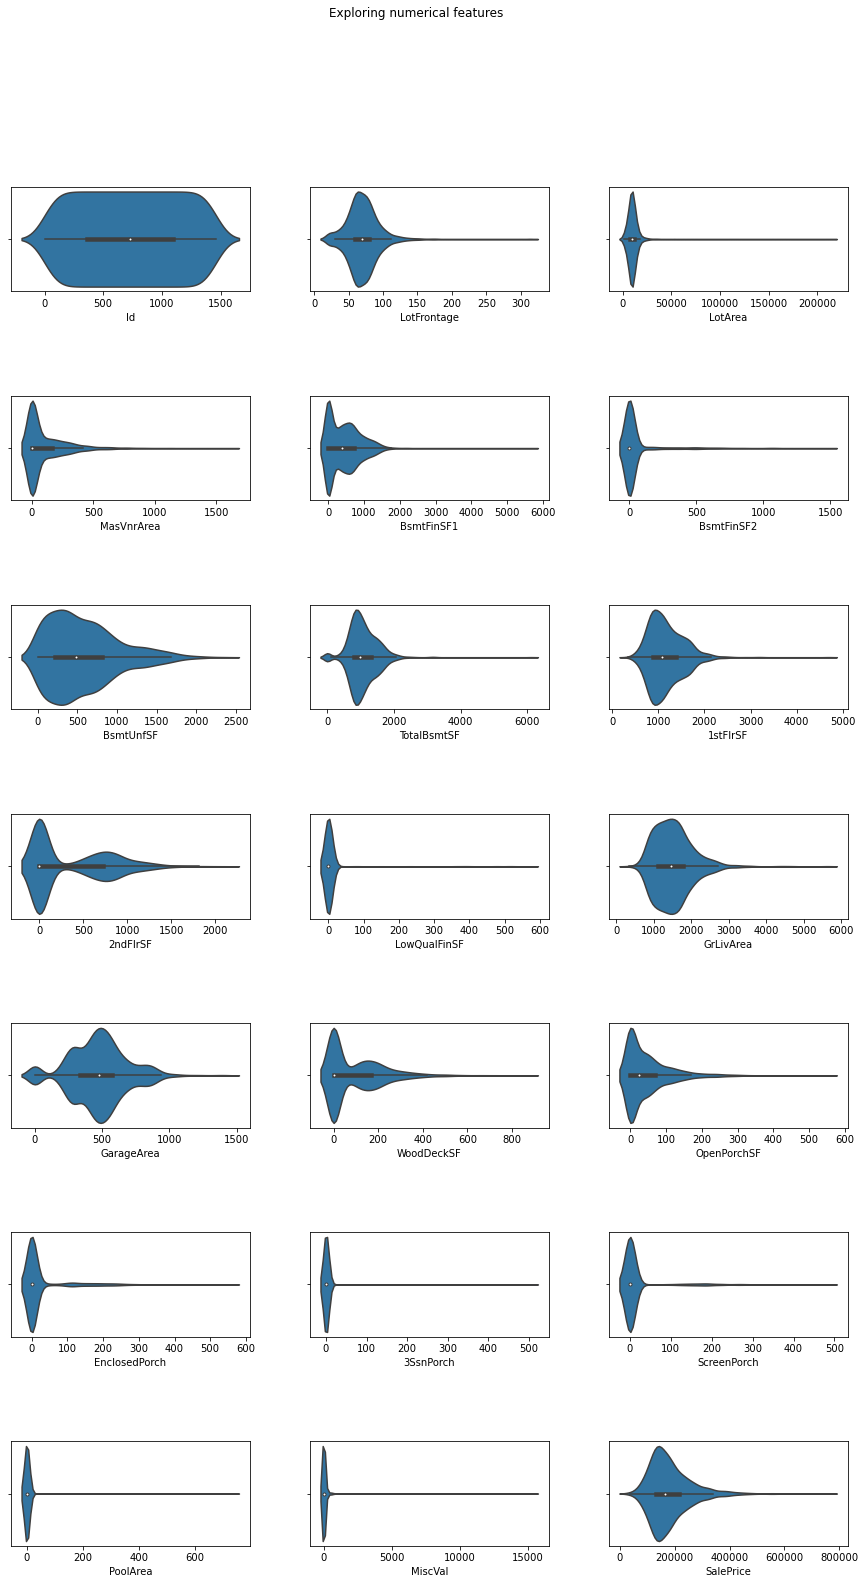

In [11]:
fig, axs = plt.subplots(7, 3, figsize=(15, 25), )
fig.suptitle('Exploring numerical features')

fig.subplots_adjust(hspace = 1, wspace=.25)

axs = axs.ravel()
for i, col in zip(range(21), numerical_vars):
    sns.violinplot(train_df[col],ax=axs[i])



### Bi-variate analysis

**Categorical data vs SalePrice**

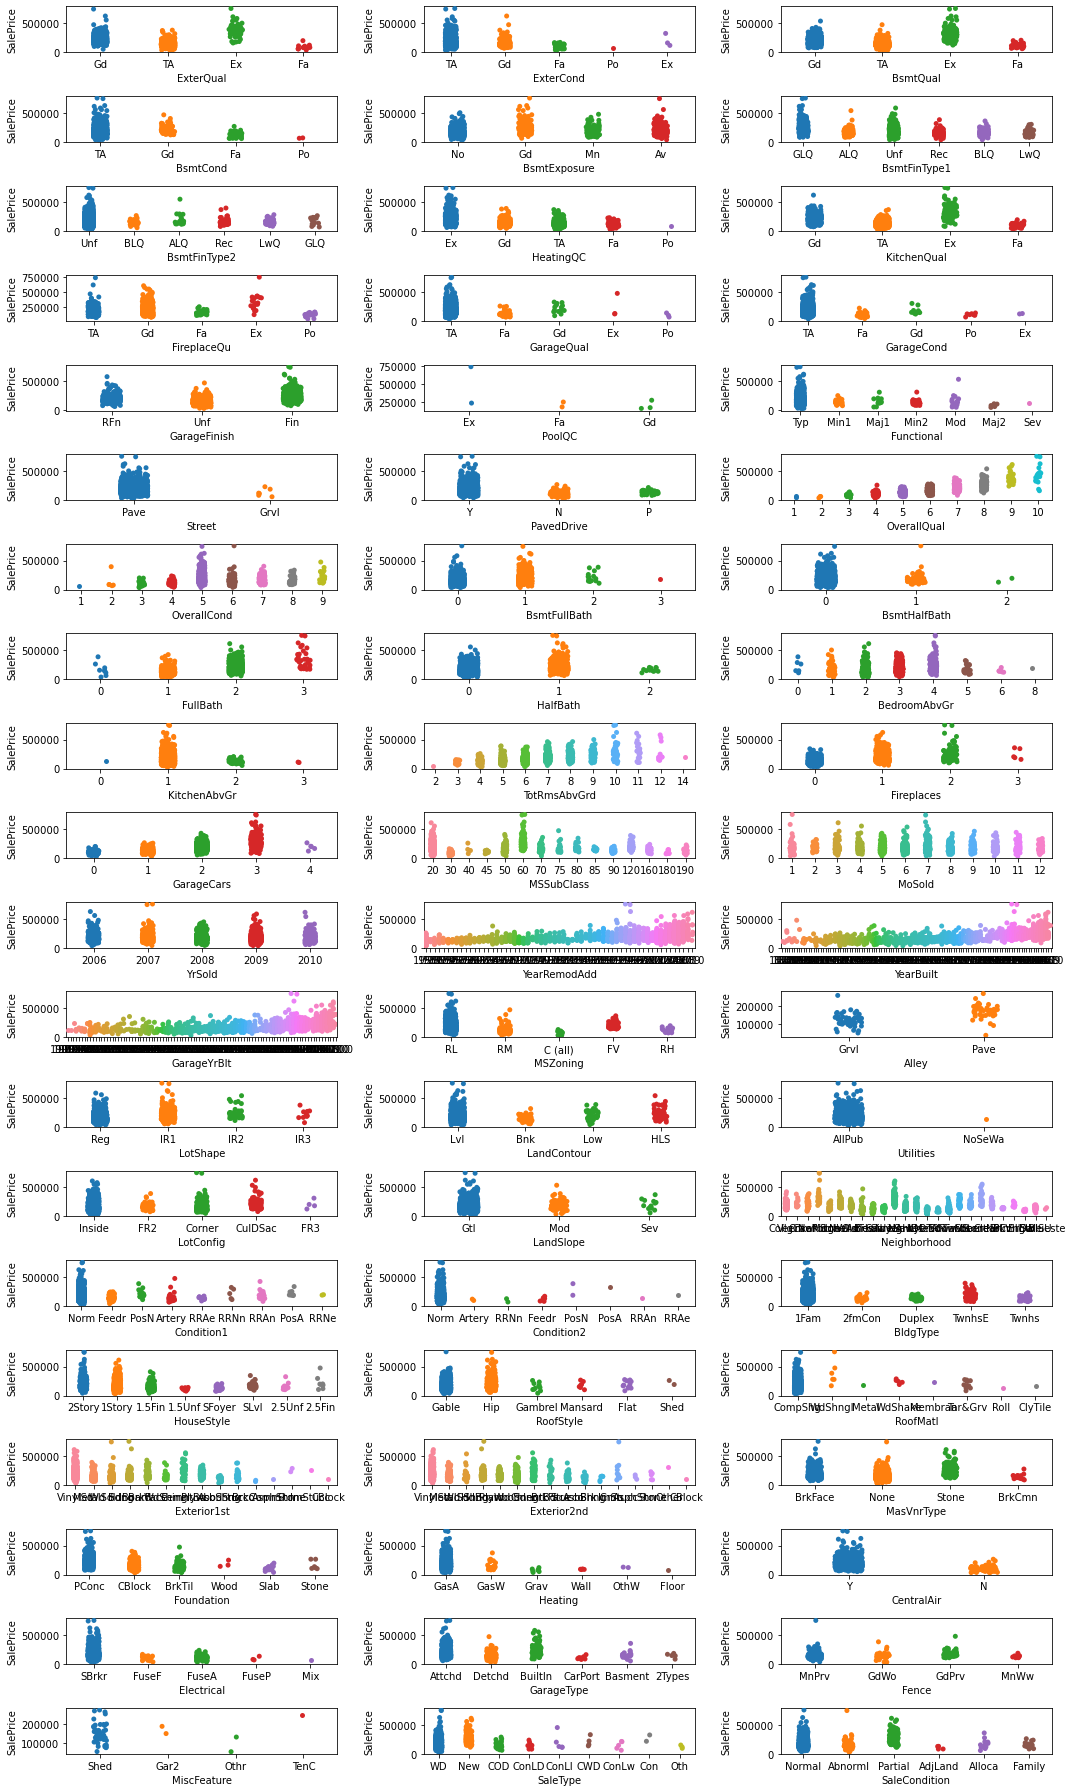

In [12]:
fig, axes = plt.subplots(ncols=3, nrows=20, figsize=(15,25))
axes = axes.flatten()
for ax, col in zip(axes,categorical_vars):
    sns.stripplot(x=col,y='SalePrice',data=train_df,ax=ax)
plt.tight_layout()  
plt.show()

From the above results, it is clear that the categories are highly imbalanced for features: Utilities and Street. As a result, they are not informative for the prediction model. Also, the minority category for the two features doesn't seem to have a very high influence on the sale price, based on the scatter plots above. Thus, I have decided to drop the two feature variables.

In [13]:
drop_vars = ['Utilities','Street']

**Numerical data vs SalePrice**

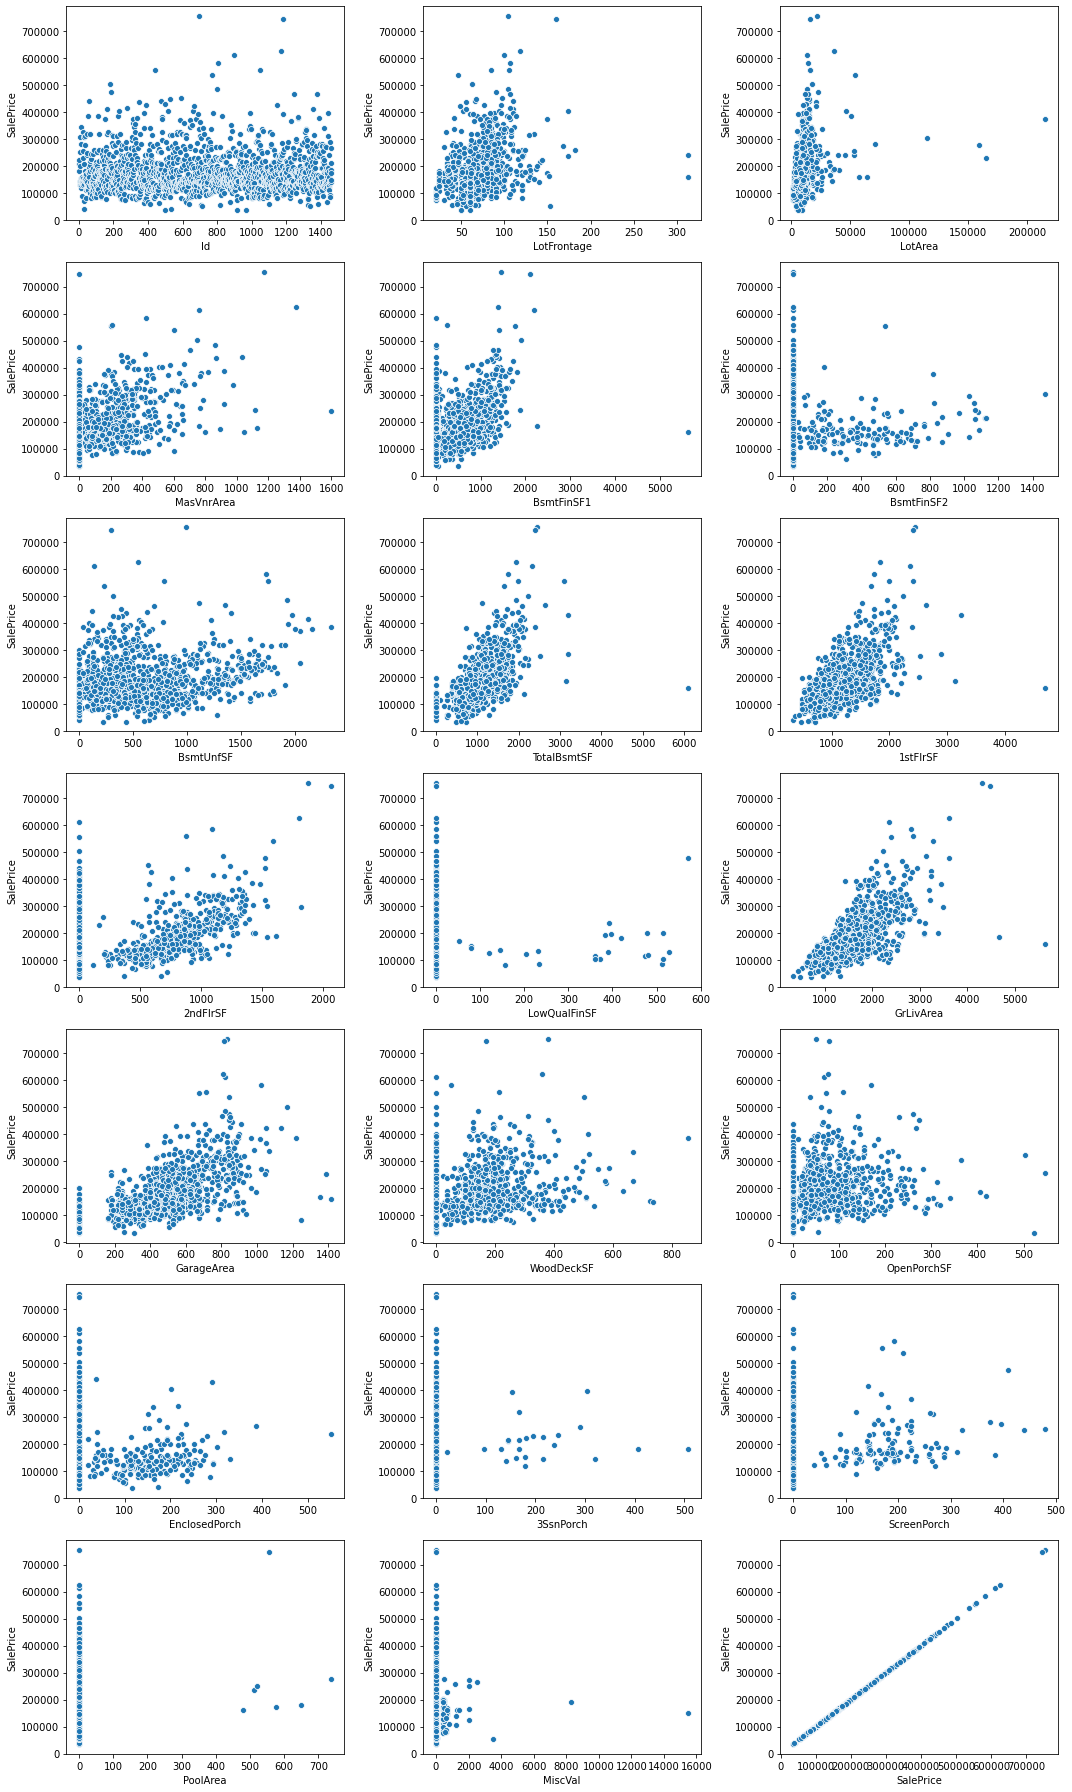

In [14]:
fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(15,25))
axes = axes.flatten()
for ax, col in zip(axes,numerical_vars):
    sns.scatterplot(train_df[col], train_df['SalePrice'],ax=ax)
plt.tight_layout()  
plt.show()

For a better idea about the overall relationship between the numerical features and SalePrice, let's look at the correlation matrix

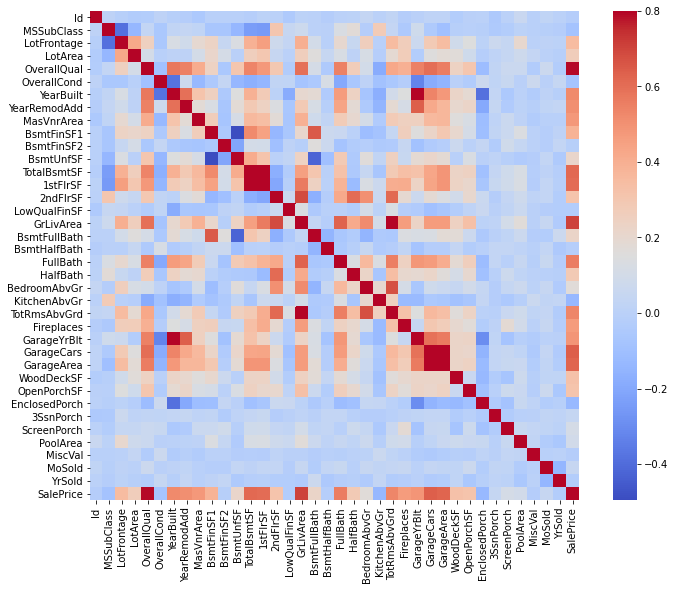

In [15]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap= 'coolwarm'); 

Heatmaps are used to visualize the correlation matrix for easier analysis. Here, the squares in red highlight the features with possible multicollinearity. The ones I have focused on are:
* TotalBsmtSF and 1stFlrSF
* GarageCars, GarageArea
* GarageYrBlt and YearBuilt
* GrLivArea and TotRmsAbvGrd 

Upon further analyzing the above features, I have observed that all the features in a group provide almost similar information. For example, the number of cars that can be parked in a garage (GarageCars) is directly related to the area occupied by the garage (GarageArea) and thus, having only one of them in the input features set is sufficient for the model. 

So, let's take a closer look at the relationship between these features and SalePrice, the target variable.

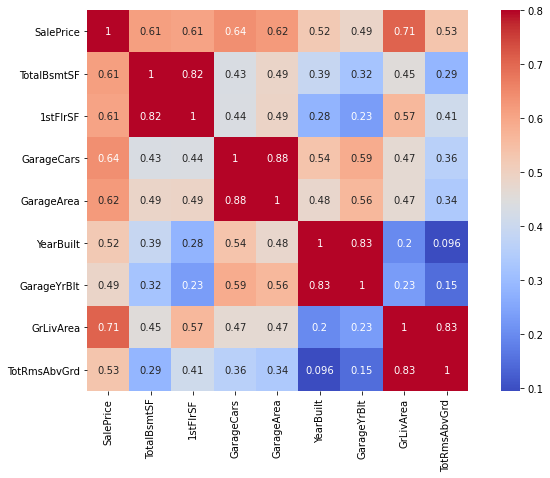

In [16]:
dum_df = corrmat.loc[['SalePrice','TotalBsmtSF','1stFlrSF','GarageCars','GarageArea',
     'YearBuilt','GarageYrBlt','GrLivArea','TotRmsAbvGrd'],['SalePrice','TotalBsmtSF','1stFlrSF','GarageCars','GarageArea',
     'YearBuilt','GarageYrBlt','GrLivArea','TotRmsAbvGrd']]

f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(dum_df, vmax=.8, square=True,cmap= 'coolwarm',annot=True); 

While GrLivArea has a better correlation with SalePrice than TotRmsAbvGrd, the remaining features in their respective groups have similar correlation with SalePrice. So, let's look at pair-wise relationship among the remaining collinear variables and SalePrice for a better understanding of these features.

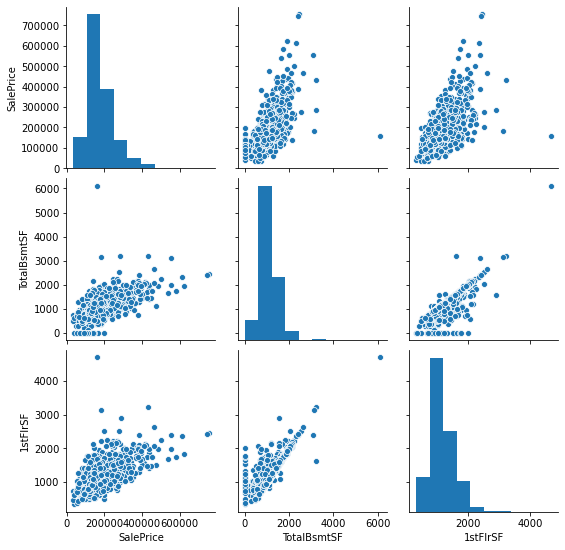

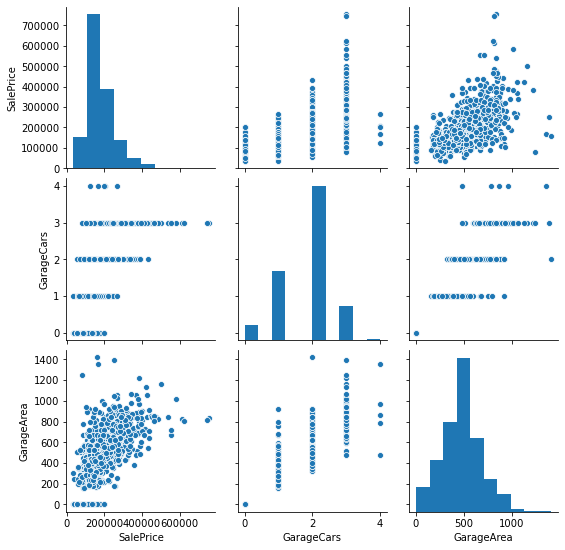

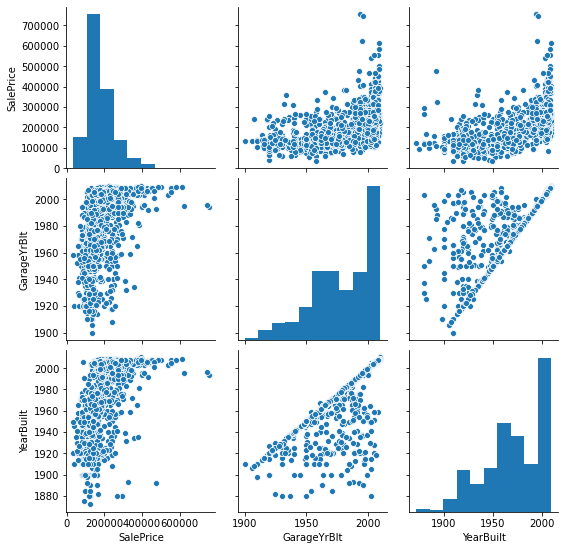

In [17]:
coll_pair = [['TotalBsmtSF','1stFlrSF'],['GarageCars','GarageArea'],
             ['GarageYrBlt','YearBuilt']] #,['GrLivArea','TotRmsAbvGrd']]


for i in range(3):    
    sns.pairplot(train_df[['SalePrice']+coll_pair[i]])


##plt.sca(ax)

Features chosen in each group:
- 1tFlrSF - as TotalBsmtSF does not provide information about the area in SF of the house when the basement is absent, unlike 1tFlrSF which is always a non-zero value.
- GarageArea - while both GarageArea and GarageCars seem to provide similar information about the size of the garage, if present, I chose to drop GarageCars as pre-processing this feature involves encoding which is memory-expensive.
- YearBuilt - as it provides more general information about the house than GarageYrBlt and has a slightly higher correlation with SalePrice
- GrLivArea - based on its higher correlation with SalePrice than TotRmsAbvGrd

Thus, the variables to be dropped are: TotalBsmtSF, GarageCars, GarageYrBlt,TotRmsAbvGrd. They are thus added to the drop_vars array. 

In [18]:
drop_vars = drop_vars + ['GarageCars','TotRmsAbvGrd','TotalBsmtSF','GarageYrBlt']

## Missing data

In [19]:
n = train_df.shape[0] #number of data points
dum = train_df.isnull().sum()/n #a dictionary containing the number of missing values corresponding to each feature

### Handling missing Categorical data

Some of these categorical features have many missing values simply because that feature is absent for those samples. For example, we know that not all houses have a pool so a missing value in PoolQC which takes values {Gd,Ex,Fa} can be considered as an indicator of the absence of the pool. However, the few samples where this feature is present, it does have an impact of SalePrice, as was observed in the bi-variate analysis plot for PoolQC. Morever, we know that houses with a pool generally have higher sale price. So, I have decided to further look into features and assign a new categorical value, NA, if the feature value is missing than to simply delete the entire feature column.

To know if the missing value is really an indicator of the feature not being present, I will make use of the grp_dict that has been created in an earlier section. By combining information from the features of each group, it is possible to determine if the underlying property is present or not for each sample with the missing data. 

Let's now check each property:

### Basement

After further inspection of the Basement variables, I could conclude that a given house sample does not have a basement when it satisfies the following two properties:
1.  From the categorical variables (BsmtQual, BsmtCon, BsmtExposure, BsmtFinType1, BsmtFinType2)

*If the data is missing for all five variables.*

2. From the numerical variables (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF)

*If all of the numerical variables are either zero or null for that sample.*


Based on the above conditions, the logic for determining if the basement is present or not is provided below:

> #Categorical features - check for null

((df['BsmtQual'].isnull() & df['BsmtCond'].isnull() & df['BsmtExposure'].isnull() & df['BsmtFinType1'].isnull() & df['BsmtFinType2'].isnull()) &

>  #Numerical features - check for 0 or null
 
(((df['BsmtFinSF1']==0)| df['BsmtFinSF1'].isnull()) & ((df['BsmtFinSF2']==0) | df['BsmtFinSF2'].isnull()) & ((df['BsmtUnfSF']==0)| df['BsmtUnfSF'].isnull() ) & ((df['TotalBsmtSF']==0)) | df['TotalBsmtSF'].isnull() ) )

Following similar logic, the code for locating the samples that do not have a fireplace, a garage, a pool, or a masonry veneer is written below:

### Fireplace

((df['FireplaceQu'].isnull()) & ((df['Fireplaces']==0)| df['Fireplaces'].isnull())) 

### Pool

((df['PoolQC'].isnull()) & ((df['PoolArea']==0)| df['PoolArea'].isnull())) 

### Garage

In case of the garage property, there are multiple categorical features. As a result they are all checked together for null values, similar to the basement case.

(((df['GarageType'].isnull()) & (df['GarageFinish'].isnull()) & (df['GarageQual'].isnull()) & (df['GarageCond'].isnull())) & ((df['GarageCars']==0)| df['GarageCars'].isnull()))

### Masonry Veneer

Here, MasVnrType variable has None value to indicate the absence of the veneer. As a result, the logic for this categorical variable requires either having null value or None value to indicate the absence of the veneer for the given sample.

(((df['MasVnrType'].isnull())| df['MasVnrType']=='None') & ((df['MasVnrArea']==0)| df['MasVnrArea'].isnull())) 
    

Combining the above conditions, I have written a function below to check all of the listed properties in the group

In [20]:
def grp_chk(df,grp_dict):
    bool_chk = {}
    #Basement
    bool_chk['Bsmt'] = ((df['BsmtQual'].isnull() & df['BsmtCond'].isnull() & df['BsmtExposure'].isnull() 
                 & df['BsmtFinType1'].isnull() & df['BsmtFinType2'].isnull()) & 
                 (((df['BsmtFinSF1']==0)| df['BsmtFinSF1'].isnull()) & 
                  ((df['BsmtFinSF2']==0) | df['BsmtFinSF2'].isnull()) & 
                  ((df['BsmtUnfSF']==0)| df['BsmtUnfSF'].isnull() ) & 
                  ((df['TotalBsmtSF']==0)) | df['TotalBsmtSF'].isnull() ) )
    
    #Fireplace
    bool_chk['Fireplace'] = ((df['FireplaceQu'].isnull()) & #categorical
                  ((df['Fireplaces']==0)| df['Fireplaces'].isnull())) #numerical
    
    #Pool
    bool_chk['Pool'] = ((df['PoolQC'].isnull()) & #categorical
                  ((df['PoolArea']==0)| df['PoolArea'].isnull())) #numerical
    
    #Garage
    bool_chk['Garage'] = (#categorical
    ((df['GarageType'].isnull()) & (df['GarageFinish'].isnull()) & 
                (df['GarageQual'].isnull()) & (df['GarageCond'].isnull())) & 
               #numerical
                  ((df['GarageCars']==0)| df['GarageCars'].isnull()))
    
    #Masonry Veneer
    bool_chk['Mas_veneer'] = (((df['MasVnrType'].isnull())| df['MasVnrType']=='None') & #categorical
                  ((df['MasVnrArea']==0)| df['MasVnrArea'].isnull())) #numerical
    
    for key in grp_dict:
        for feat in grp_dict[key]:
            if df[feat].dtype == 'object':
                df.loc[bool_chk[key],feat]='NA' 
            else:
                df.loc[bool_chk[key],feat]=0
    return df

## Transformations:

In [21]:
# Transformation(1) - Typecasting the feature columns in num2strCat array
train_df = train_df.astype(transf1_dict)

# Transformation(2) - Filling values for missing features in grp_dict
train_df = grp_chk(train_df,grp_dict)

# Transformation(3) - Dropping unneccessary features
train_df.drop(drop_vars, axis=1, inplace=True)

### Handling missing values for the remaining feature variables

Based on the type of data, the missing data is imputed by the following techniques:
1. By median - if the data is numerical
2. By mode - if the data is categorical

The code for the same can be found below:

***Transformation(4) - FillNA***

In [22]:
for col in train_df.columns:
    if train_df[col].isnull().sum():
        if col in numerical_vars:
            train_df[col].fillna(train_df[col].median(),inplace=True)
        else:
            train_df[col].fillna(train_df[col].mode()[0],inplace=True)
    

Finally, let's check to ensure there is no missing data

In [23]:
train_df.isnull().sum().sum()

0

# Encoding Categorical Values

To implement encoding, it is generally important to have domain information to ensure that the categories with ordinal values get the appropriate label encoding.

Here, we first look at the different values each category takes.

Use *replace* to encode the categories. Here, we created a dictionary that can be used to encode categorical variables describing quality levels (ordinal values)

***Transformation(5) - Encoding QC variables***

In [24]:
qual_dict = {'NA':0,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
lst_qc = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
cat_dict = dict.fromkeys(lst_qc,qual_dict)
train_df.replace(cat_dict,inplace=True)



Among the rest of the categorical data, we look at the features that clearly have ordinal values. They are: GarageFinish, BsmtExposure, BsmtFinType1, BsmtFinType2, Functional.

Let's look at what each of the value in these features mean so they can be appropriately encoded.

**GarageFinish**: Interior finish of the garage
*    Fin - Finished
*    RFn - Rough Finished  
*    Unf - Unfinished
*    NA  - No Garage 
 
 Assigned values: 'None'=0, 'Unf'=1, 'RFn'=2, 'Fin'=3
 
**BsmtExposure**: Refers to walkout or garden level walls
*    Gd - Good Exposure
*    Av - Average Exposure 
*    Mn - Mimimum Exposure
*    No - No Exposure
*    NA - No Basement
 
 Assigned values: 'None'=0, 'No'=1, 'Mn'=2, 'Av'=3, 'Gd'=4
  
**BsmtFinType1/BsmtFinType2**: Rating of basement finished area
*    GLQ - Good Living Quarters
*    ALQ - Average Living Quarters
*    BLQ - Below Average Living Quarters   
*    Rec - Average Rec Room
*    LwQ - Low Quality
*    Unf - Unfinshed
*    NA  - No Basement
  
  Assigned values: 'None'=0, 'Unf'=1, 'LwQ'=2, 'Rec'=3, 'BLQ'=4, 'ALQ'=5, 'GLQ'=6
  
**Functional**: Home functionality
*    Typ  - Typical Functionality
*    Min1 - Minor Deductions 1
*    Min2 - Minor Deductions 2
*    Mod  - Moderate Deductions
*    Maj1 - Major Deductions 1
*    Maj2 - Major Deductions 2
*    Sev  - Severely Damaged
*    Sal  - Salvage only
  
  Assigned values: 'Sal'=0, 'Sev'=1, 'Maj2'=2, 'Maj1'=3, 'Mod'=4, 'Min2'=5, 'Min1'=6, 'Typ'=7
  
**Street**: Type of road access to property

*    Grvl - Gravel  
*    Pave - Paved

  Assigned values: 'Grvl'=0, 'Pave'=1
  
**PavedDrive**: Paved driveway

*    Y    Paved 
*    P    Partial Pavement
*    N    Dirt/Gravel
   
   Assigned values: 'N'=0, 'P'=1, 'Y'=2

***Transformation(6) - Encoding remaining ordinal variables***

In [25]:
gar_fin = {'None':0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
bsmt_exp = {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
bsmt_fin = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
home_func = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
pvd_drv = {'N':0,'P':1,'Y':2}
ord_dict = {'GarageFinish':gar_fin, 'BsmtExposure':bsmt_exp,'BsmtFinType1':bsmt_fin, 'BsmtFinType2':bsmt_fin, 'Functional': home_func,'PavedDrive':pvd_drv}

train_df.replace(ord_dict, inplace=True)



Use get_dummies to do One-Hot Encoding for the rest of the categorical variables

***Transformation(7) - Encoding nominal categorical variables***

In [26]:
dum_cat = [col for col in train_df.columns if train_df[col].dtype == 'object' ]
train_df = pd.get_dummies(train_df)


***Transformation(8) - Applying log transformation to the positively skewed target variable***

In [27]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])
